In [1]:
%matplotlib inline

In [2]:
#-----------------------------------------------------------
import math
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from matplotlib import cm        # module palettes de couleurs
import pandas as pd
import seaborn as sns

from fonctions_effetDeSerre import EffetDeSerre

from sklearn.decomposition import PCA

#-----------------------------------------------------------
plt.rcParams['font.size'] = 18
plt.rcParams['figure.figsize'] = (18, 6)
#-----------------------------------------------------------

base_filename = "acp_effetDeSerre_"

In [3]:
# Chargement des données  (période 1/1982 à 10/2011)
clim_t2  = np.array(scipy.io.loadmat('./clim_t2C_J1982D2010')['clim_t2'])  # Temperature at 2 meters (degC) 
clim_tcc = np.array(scipy.io.loadmat('./clim_tcc_J1982D2010')['clim_tcc']) # Total cloud cover (0-1)
clim_lsp = np.array(scipy.io.loadmat('./clim_lsp_J1982D2010')['clim_lsp']) # Large scale precipitation (m) 
clim_cp  = np.array(scipy.io.loadmat('./clim_cp_J1982D2010')['clim_cp'])   # Convective precipitation (m) 
clim_ssr = np.array(scipy.io.loadmat('./clim_ssr_J1982D2010')['clim_ssr']) # Surface solar radiation ((W/m^2)s)
clim_co2 = np.array(scipy.io.loadmat('./clim_co2_J1982D2010')['clim_co2']) # CO2 ppm

annee = clim_t2[:,0]

assert(np.all(clim_t2[:,1] == clim_tcc[:,1]) and np.all(clim_t2[:,1] == clim_lsp[:,1])
       and np.all(clim_t2[:,1] == clim_cp[:,1]) and np.all(clim_t2[:,1] == clim_ssr[:,1])
       and np.all(clim_t2[:,1] == clim_co2[:,1]))
mois = clim_t2[:,1]
temps = annee + (mois-1)/12

clim_t2  = np.delete(clim_t2, [0,1], axis=1)
clim_tcc = np.delete(clim_tcc, [0,1], axis=1)
clim_lsp = np.delete(clim_lsp, [0,1], axis=1)
clim_cp  = np.delete(clim_cp, [0,1], axis=1)
clim_ssr = np.delete(clim_ssr, [0,1], axis=1)
clim_co2 = np.delete(clim_co2, [0,1], axis=1)

# informations associees aux donnees
noms_des_variables   = ('t2','tcc','lsp','cp','ssr','CO2') 
nombre_de_variables = len(noms_des_variables)                      # Nombre de variables
noms_des_lieux       = ('Reykjavik','Oslo','Paris','New York','Tunis','Alger','Beyrouth','Atlan','Dakar')
nombre_de_lieux     = len(noms_des_lieux)                          # Nombre de villes
noms_des_mois        = ('janv','fév','mars','avril','mai','juin','juil','aout','sept','oct','nov','déc')
nombre_de_mois      = len(noms_des_mois)

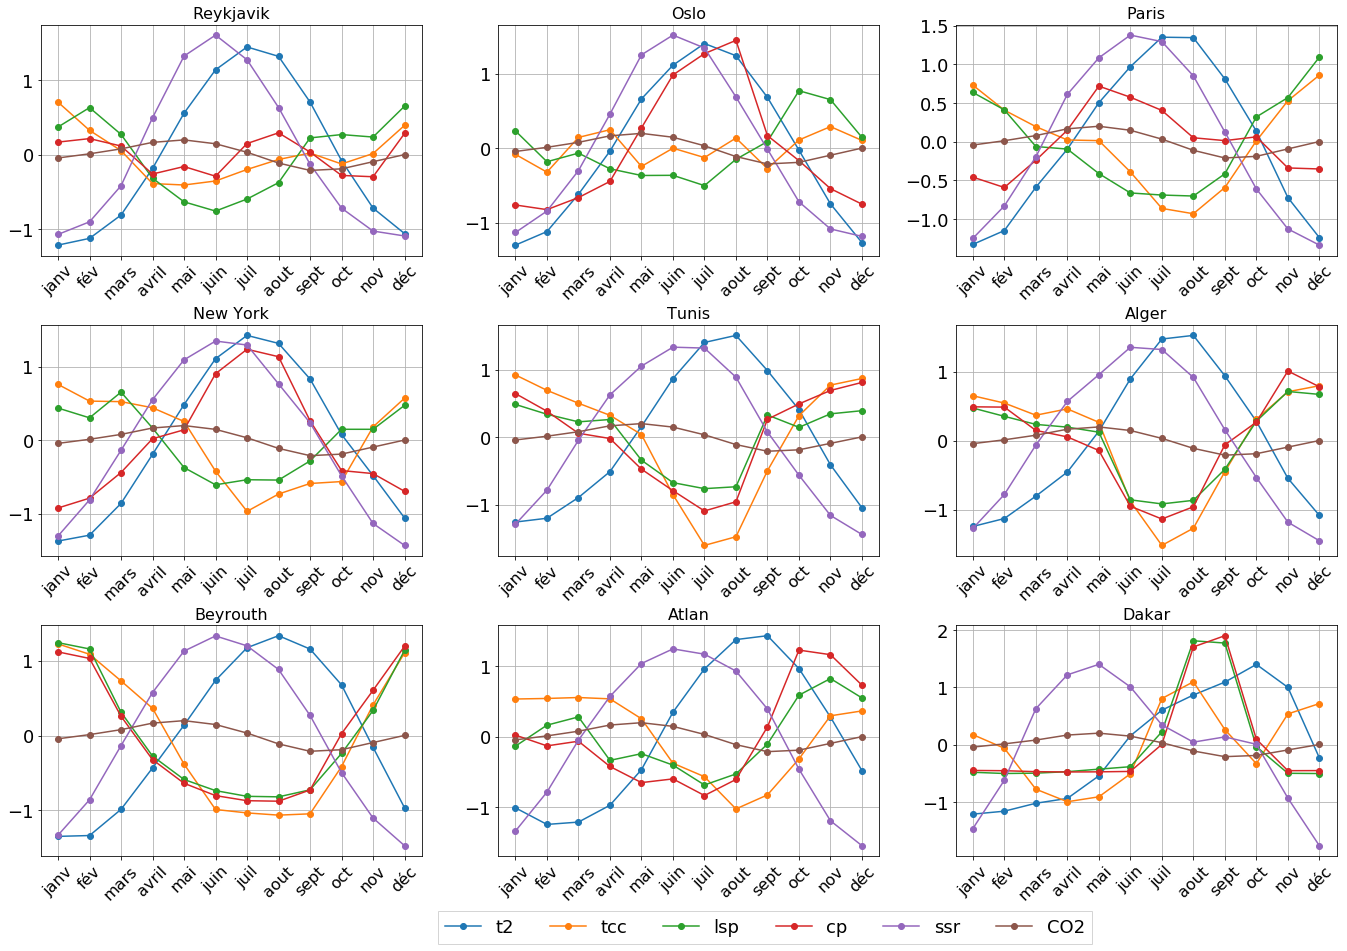

In [6]:
paletteDeCouleurs = cm.hsv(np.linspace(0,1,nombre_de_variables+1))
#Calcul et affichage des climatologies (par ville )
fig = plt.figure(figsize=(20,14))
climatologie = np.zeros((nombre_de_mois,nombre_de_variables))
# Boucle sur les villes
for k in range(0,nombre_de_lieux):
    # aggregation des donnees pour la keme ville
    Z = np.array([clim_t2[:,k], clim_tcc[:,k], clim_lsp[:,k], 
        clim_cp[:,k], clim_ssr[:,k], clim_co2[:,0]])
    # Centrage et Réduction des variables
    X = ((Z.T-Z.mean(axis=1))/Z.std(axis=1)).T;
    # Calcul de la climatologie (moyenne par mois)
    for m in range(nombre_de_mois):
        climatologie[m,:] = np.mean(X[:,mois==m+1],axis=1)
    # Affichage
    plt.subplot(3,3,k+1)
    plt.plot(climatologie,'-o')
    plt.title(noms_des_lieux[k],fontsize=16)
    plt.xticks(np.arange(nombre_de_mois),noms_des_mois,fontsize=16,rotation=45)
    #ax.set_xticklabels(xticklabels, rotation = 45, ha="right")
    #plt.xlabel('mois')
    plt.grid(True)
plt.legend(noms_des_variables,loc='upper center', bbox_to_anchor=(-0.5, -0.2),fancybox=False, shadow=False, ncol=nombre_de_variables);
fig.subplots_adjust(top=.95,
                    #bottom=-.2,
                    hspace = 0.3,
                    left = 0.05, 
                    right = .95, 
                    wspace=0.2)
filename = (base_filename 
            + "climatologiesMensuellesParVille" 
            + ".png")
fig.savefig(filename, dpi=300)
# voir pour faire l'aggregation de Z directement en numpy array